Number of scam samples: 20
Number of non-scam samples: 20
Total number of samples in the balanced dataset: 40
Training data: Scam = 50.00%, Non-Scam = 50.00%
Testing data: Scam = 50.00%, Non-Scam = 50.00%
Training model on Text_Encoded_Word column
Epoch 1/3
1/1 [==============================] - 11s 11s/step - loss: 0.6935 - accuracy: 0.3125 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 3s 3s/step - loss: 0.6888 - accuracy: 0.4688 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 0s 27ms/step - loss: 0.6927 - accuracy: 0.5000
Test accuracy on Text_Encoded_Word column: 0.5
1/1 [==============================] - 1s 820ms/step
Confusion matrix on Text_Encoded_Word column:
 [[0 4]
 [0 4]]

Confusion Matrix Explanation:
True Negative (TN): 0 Non-scam tweets correctly classified as non-scam
False Positive (FP): 4 Non-scam tweets incorrectly classified as scam
False Negative (FN): 0 Scam tweets incorrectly c

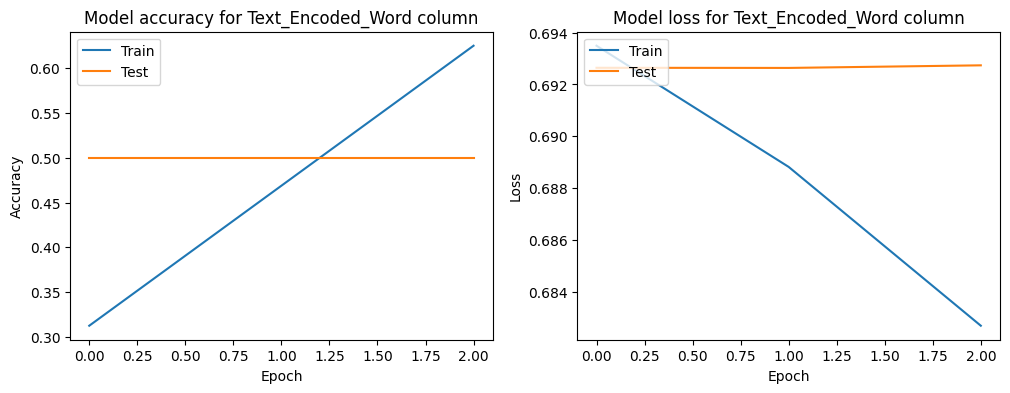

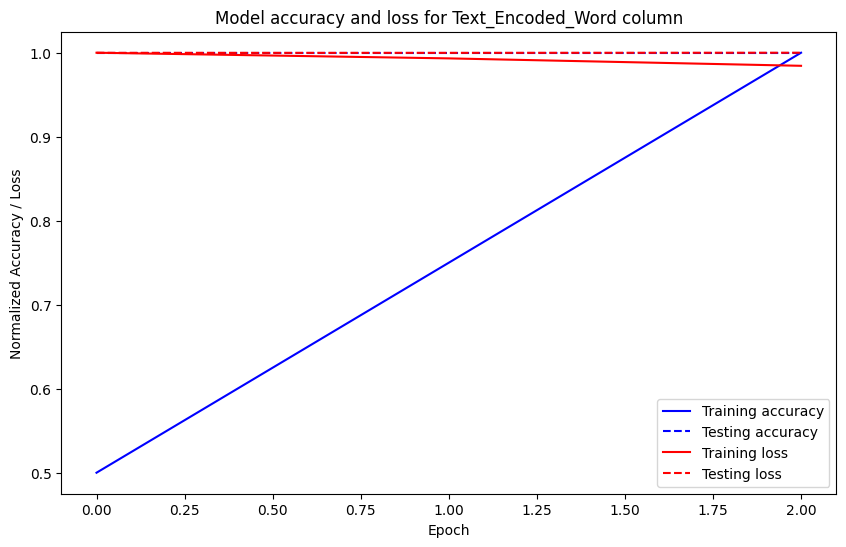

Training model on Text_Encoded_Character column
Epoch 1/10
1/1 [==============================] - 15s 15s/step - loss: 0.6920 - accuracy: 0.6250 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.6944 - accuracy: 0.3125 - val_loss: 0.6923 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.6934 - accuracy: 0.5625 - val_loss: 0.6918 - val_accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.6899 - accuracy: 0.5938 - val_loss: 0.6915 - val_accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.6905 - accuracy: 0.5938 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.6864 - accuracy: 0.6562 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.6890 - accuracy: 0.5312 - val_loss: 0.6908 - val_accuracy

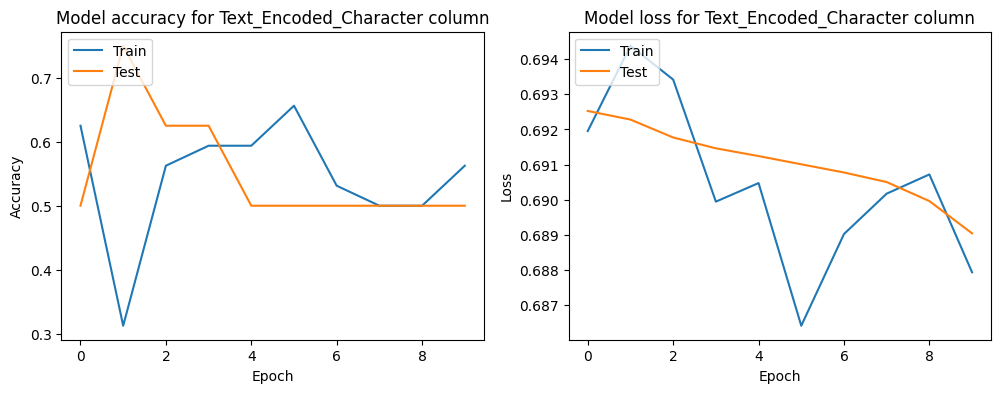

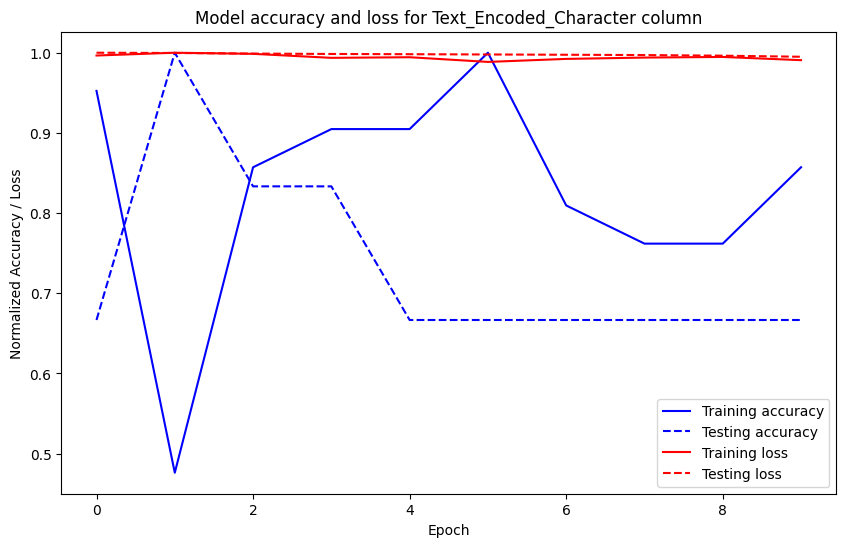

In [1]:

##testing Attention(Layer)...bidirectional_lstm_gru_model


import tensorflow as tf
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)
import numpy as np
import random
import tensorflow as tf

# Set the seed for random number generation
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


###balanced input 50%-50% and improved model ++++


import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'


os.chdir('C:/1/1 portablezzz n personals/1 studying/term 2/deep learning/1 TERM PAPER/1 joan')

# Read the CSV file
data = pd.read_csv('Cleaned_Data joan output 1gb.csv')
# Find the maximum index value from both columns
#max_word_index = max(data['Text_Encoded_Word'].apply(max).max(), data['Text_Encoded_Character'].apply(max).max())
#print(max_word_index)

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('Cleaned_Data joan output 1gb.csv')

# Split the dataset into scam and non-scam dataframes
scam_data = data[data['Scam'] == 1]
non_scam_data = data[data['Scam'] == 0]

# Find the minimum number of samples between scam and non-scam dataframes
min_samples = min(len(scam_data), len(non_scam_data))

# Calculate the number of samples for each class to make 10% of the main dataset
sample_size = int(0.0001 * len(data) / 2)

# Cap the sample size to the minimum number of samples if it exceeds the available samples in either class
sample_size = min(sample_size, min_samples)

# Randomly sample the specified number of rows from each dataframe
sampled_scam_data = scam_data.sample(sample_size, random_state=42)
sampled_non_scam_data = non_scam_data.sample(sample_size, random_state=42)

# Concatenate the two sampled dataframes to create a balanced dataset
balanced_data = pd.concat([sampled_scam_data, sampled_non_scam_data], axis=0)
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset

# Print the number of samples taken from each class
print(f"Number of scam samples: {len(sampled_scam_data)}")
print(f"Number of non-scam samples: {len(sampled_non_scam_data)}")

# Print the total number of samples in the balanced_data DataFrame
print(f"Total number of samples in the balanced dataset: {len(balanced_data)}")


# Split the balanced dataset into training and testing sets, maintaining the 50-50 balance
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=42, stratify=balanced_data['Scam'])

# Calculate the percentage of scam and non-scam samples in the train_data
train_scam_count = train_data['Scam'].sum()
train_total_count = len(train_data)
train_scam_percentage = (train_scam_count / train_total_count) * 100
train_non_scam_percentage = 100 - train_scam_percentage

print(f"Training data: Scam = {train_scam_percentage:.2f}%, Non-Scam = {train_non_scam_percentage:.2f}%")

# Calculate the percentage of scam and non-scam samples in the test_data
test_scam_count = test_data['Scam'].sum()
test_total_count = len(test_data)
test_scam_percentage = (test_scam_count / test_total_count) * 100
test_non_scam_percentage = 100 - test_scam_percentage

print(f"Testing data: Scam = {test_scam_percentage:.2f}%, Non-Scam = {test_non_scam_percentage:.2f}%")

# train_data, test_data are already defined when you split the balanced_data earlier

# Prepare the data
max_length = 100  # Set your desired max length for padding
max_words = 1700000  # Set the maximum number of words in the vocabulary


import ast

train_data['Text_Encoded_Word'] = train_data['Text_Encoded_Word'].apply(ast.literal_eval)
test_data['Text_Encoded_Word'] = test_data['Text_Encoded_Word'].apply(ast.literal_eval)

train_data['Text_Encoded_Character'] = train_data['Text_Encoded_Character'].apply(ast.literal_eval)
test_data['Text_Encoded_Character'] = test_data['Text_Encoded_Character'].apply(ast.literal_eval)


# Process 'Text_Encoded_Word' column,, 'Text_Encoded_Word' column, which contains tokenized text at the word level
X_train_word = pad_sequences(train_data['Text_Encoded_Word'].tolist(), maxlen=max_length)
X_test_word = pad_sequences(test_data['Text_Encoded_Word'].tolist(), maxlen=max_length)

# Process 'Text_Encoded_Character' column,,contains tokenized text at the character level,
X_train_char = pad_sequences(train_data['Text_Encoded_Character'].tolist(), maxlen=max_length)
X_test_char = pad_sequences(test_data['Text_Encoded_Character'].tolist(), maxlen=max_length)

# Process 'Scam' column
y_train = train_data['Scam'].values
y_test = test_data['Scam'].values

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, BatchNormalization, GlobalMaxPooling1D, Dense, Activation, Dropout
from keras.regularizers import l2

from keras.layers import SpatialDropout1D, MaxPooling1D

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Activation, Dropout

from keras.layers import LSTM, GRU

from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, GRU, Dense


from keras.layers import Layer
import keras.backend as K

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight",
                                 shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="attention_bias",
                                 shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        return super(Attention, self).get_config()



def bidirectional_lstm_gru_model(embedding_matrix=None):
    model = Sequential()

    if embedding_matrix is None:
        model.add(Embedding(max_words, 200, input_length=max_length))
    else:
        model.add(Embedding(max_words, 200, input_length=max_length, weights=[embedding_matrix], trainable=False))

    model.add(SpatialDropout1D(0.2))

    # Add bidirectional LSTM layer
    model.add(Bidirectional(LSTM(64, return_sequences=True)))

    # Add bidirectional GRU layer
    model.add(Bidirectional(GRU(64, return_sequences=True)))

    # Add attention layer
    model.add(Attention())

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation='sigmoid'))

    return model



# Instantiate the model
model = bidirectional_lstm_gru_model()

# Compile the model
#model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
#history = model.fit(input_data[model_type]['input'], y_train, validation_data=(input_data[model_type]['input'], y_test), epochs=input_data[model_type]['epochs'], batch_size=64)






import numpy as np
from sklearn.metrics import confusion_matrix

# Define a list containing dictionaries for word-level and character-level input data
input_data = [
    {
        "name": "Text_Encoded_Word",
        "X_train": X_train_word,
        "X_test": X_test_word,
        "epochs": 3  # Set the number of epochs for Text_Encoded_Word
    },
    {
        "name": "Text_Encoded_Character",
        "X_train": X_train_char,
        "X_test": X_test_char,
        "epochs": 10  # Set the number of epochs for Text_Encoded_Character
    }
]

import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

for data in input_data:
    print(f"Training model on {data['name']} column")
    # Assign X_train and X_test from the current input_data dictionary
    X_train = data["X_train"]
    X_test = data["X_test"]

    # Instantiate the model
    model = bidirectional_lstm_gru_model()

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train the model with the corresponding number of epochs
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=data["epochs"], batch_size=64)



    # Evaluate the model
    loss, accuracy = model.evaluate(data['X_test'], y_test)
    print(f"Test accuracy on {data['name']} column: {accuracy}")

    # Calculate confusion matrix
    y_pred = np.round(model.predict(data['X_test']))
    cm = confusion_matrix(y_test, y_pred)
    # Print the confusion matrix along with an explanation
    print(f"Confusion matrix on {data['name']} column:\n {cm}\n")
    print("Confusion Matrix Explanation:")
    print("True Negative (TN):", cm[0][0], "Non-scam tweets correctly classified as non-scam")
    print("False Positive (FP):", cm[0][1], "Non-scam tweets incorrectly classified as scam")
    print("False Negative (FN):", cm[1][0], "Scam tweets incorrectly classified as non-scam")
    print("True Positive (TP):", cm[1][1], "Scam tweets correctly classified as scam\n")

    # Create a single figure with two subplots: one for accuracy and one for loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    import matplotlib.pyplot as plt

    # Plot training & validation accuracy values on the first subplot
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'Model accuracy for {data["name"]} column')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values on the second subplot
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'Model loss for {data["name"]} column')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    # Show the figure
    plt.show()

    # Normalize accuracy and loss values
    train_acc_norm = [acc / max(history.history['accuracy']) for acc in history.history['accuracy']]
    test_acc_norm = [acc / max(history.history['val_accuracy']) for acc in history.history['val_accuracy']]
    train_loss_norm = [loss / max(history.history['loss']) for loss in history.history['loss']]
    test_loss_norm = [loss / max(history.history['val_loss']) for loss in history.history['val_loss']]

    # Create a single figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot training & validation accuracy values on the same plot
    ax.plot(train_acc_norm, 'b', label='Training accuracy')
    ax.plot(test_acc_norm, 'b--', label='Testing accuracy')

    # Plot training & validation loss values on the same plot
    ax.plot(train_loss_norm, 'r', label='Training loss')
    ax.plot(test_loss_norm, 'r--', label='Testing loss')

    # Set title, labels, and legend
    ax.set_title(f'Model accuracy and loss for {data["name"]} column')
    ax.set_ylabel('Normalized Accuracy / Loss')
    ax.set_xlabel('Epoch')
    ax.legend()

    # Show the figure
    plt.show()
